Resumen de datos después de limpieza:
       Precio  Parqueos  Dormitorios  Baños  Tamaño
count     187       187          187    187     187
mean    2,043         2            2      2     162
std     1,848         1            1      1     110
min       625         1            1      1      36
25%       972         2            2      2      89
50%     1,625         2            2      2     139
75%     2,200         2            3      2     204
max    17,000         4            4      5     809

Resultados de la regresión múltiple:
Coeficientes: [7.57011074e+02 2.88792359e+01 4.04154708e-01 4.34359637e+00]
Intercepto: -175.69666661987594
R²: 0.22487014389798754


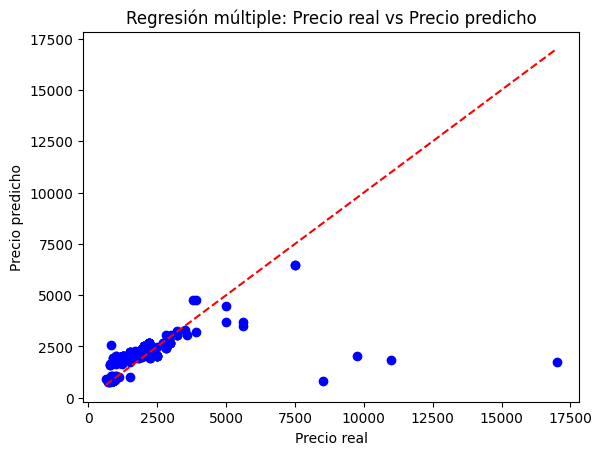

Análisis de regresión múltiple completado.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Configurar pandas para evitar notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Cargar los datos desde un archivo CSV
data = pd.read_csv("apartamentos_zona_14.csv")

# Función para limpiar precios
def clean_price(price):
    if pd.isna(price) or price == "N/A":
        return None
    price = re.sub(r'[^0-9]', '', str(price))  # Eliminar caracteres no numéricos
    try:
        return int(price)  # Convertir a entero
    except ValueError:
        return None

# Función para limpiar parqueos
def clean_parking(parking):
    if pd.isna(parking) or parking == "N/A":
        return None
    try:
        return int(parking)
    except ValueError:
        return None

# Función para limpiar el tamaño (eliminar "m2" y convertir a número)
def clean_size(size):
    if pd.isna(size) or size == "N/A":
        return None
    size = str(size).replace("m2", "").strip()  # Eliminar "m2" y espacios extra
    try:
        return float(size)  # Convertir a número
    except ValueError:
        return None

# Aplicar limpieza a las columnas relevantes
data["Precio"] = data["Precio"].apply(clean_price)
data["Parqueos"] = data["Parqueos"].apply(clean_parking)
data["Tamaño"] = data["Tamaño"].apply(clean_size)

# Eliminar filas con valores nulos en las columnas relevantes
data_clean = data.dropna(subset=["Precio", "Parqueos", "Dormitorios", "Baños", "Tamaño"])

# Verificar si hay datos suficientes
if data_clean.empty:
    print("No hay suficientes datos para la regresión múltiple.")
else:
    print("Resumen de datos después de limpieza:")
    print(data_clean.describe())

    # Definir las variables independientes (X) y dependiente (y)
    X = data_clean[["Parqueos", "Dormitorios", "Baños", "Tamaño"]]
    y = data_clean["Precio"]

    # Crear el modelo de regresión lineal múltiple
    model = LinearRegression()
    model.fit(X, y)

    # Calcular R²
    r_squared = model.score(X, y)

    # Mostrar los resultados del modelo
    print("\nResultados de la regresión múltiple:")
    print(f"Coeficientes: {model.coef_}")
    print(f"Intercepto: {model.intercept_}")
    print(f"R²: {r_squared}")

    # Graficar los valores predichos vs los valores reales
    plt.scatter(y, model.predict(X), color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.xlabel("Precio real")
    plt.ylabel("Precio predicho")
    plt.ticklabel_format(style='plain', axis='both')  # Evitar notación científica en la gráfica
    plt.title("Regresión múltiple: Precio real vs Precio predicho")
    plt.show()

print("Análisis de regresión múltiple completado.")

Resumen de datos después de limpieza:
       Precio  Parqueos  Dormitorios  Baños  Tamaño
count     187       187          187    187     187
mean    2,043         2            2      2     162
std     1,848         1            1      1     110
min       625         1            1      1      36
25%       972         2            2      2      89
50%     1,625         2            2      2     139
75%     2,200         2            3      2     204
max    17,000         4            4      5     809

--- Regresión Múltiple: Precio vs Parqueos, Dormitorios y Baños ---

Resultados de la regresión múltiple (Parqueos, Dormitorios, Baños):
Coeficientes: [1056.82673731 -132.06128332  416.49087337]
Intercepto: -610.1518307308997
R²: 0.19965204087544575


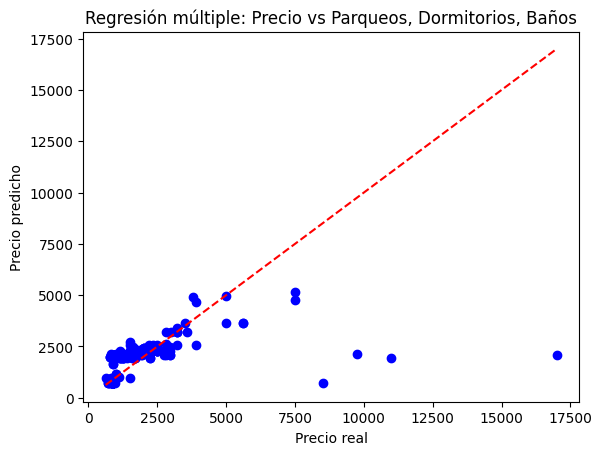


--- Regresión Múltiple: Precio vs Dormitorios, Baños y Tamaño ---

Resultados de la regresión múltiple (Dormitorios, Baños, Tamaño):
Coeficientes: [211.37761352 150.33422906   5.69825942]
Intercepto: 323.68792898108427
R²: 0.20501184002602035


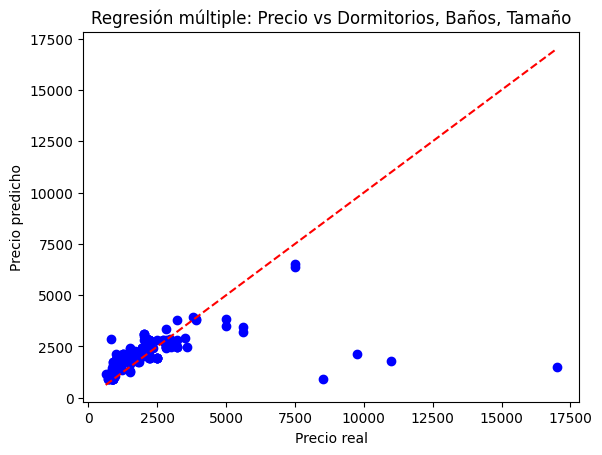

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Configurar pandas para evitar notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Cargar los datos desde un archivo CSV
data = pd.read_csv("apartamentos_zona_14.csv")

# Función para limpiar precios
def clean_price(price):
    if pd.isna(price) or price == "N/A":
        return None
    price = re.sub(r'[^0-9]', '', str(price))  # Eliminar caracteres no numéricos
    try:
        return int(price)  # Convertir a entero
    except ValueError:
        return None

# Función para limpiar parqueos
def clean_parking(parking):
    if pd.isna(parking) or parking == "N/A":
        return None
    try:
        return int(parking)
    except ValueError:
        return None

# Función para limpiar el tamaño (eliminar "m2" y convertir a número)
def clean_size(size):
    if pd.isna(size) or size == "N/A":
        return None
    size = str(size).replace("m2", "").strip()  # Eliminar "m2" y espacios extra
    try:
        return float(size)  # Convertir a número
    except ValueError:
        return None

# Aplicar limpieza a las columnas relevantes
data["Precio"] = data["Precio"].apply(clean_price)
data["Parqueos"] = data["Parqueos"].apply(clean_parking)
data["Tamaño"] = data["Tamaño"].apply(clean_size)

# Eliminar filas con valores nulos en las columnas relevantes
data_clean = data.dropna(subset=["Precio", "Parqueos", "Dormitorios", "Baños", "Tamaño"])

# Verificar si hay datos suficientes
if data_clean.empty:
    print("No hay suficientes datos para la regresión múltiple.")
else:
    print("Resumen de datos después de limpieza:")
    print(data_clean.describe())

    # Combinación 1: Precio vs Parqueos, Dormitorios y Baños
    print("\n--- Regresión Múltiple: Precio vs Parqueos, Dormitorios y Baños ---")

    # Definir las variables independientes (X) y dependiente (y)
    X = data_clean[["Parqueos", "Dormitorios", "Baños"]]
    y = data_clean["Precio"]

    # Verificar que no haya valores NaN en X
    if X.isnull().any().any():
        print("Advertencia: X contiene valores NaN. Eliminando filas con NaN...")
        X = X.dropna()
        y = y[X.index]  # Asegurarse de que y tenga el mismo índice que X

    # Crear el modelo de regresión lineal múltiple
    model = LinearRegression()
    model.fit(X, y)

    # Calcular R²
    r_squared = model.score(X, y)

    # Mostrar los resultados del modelo
    print("\nResultados de la regresión múltiple (Parqueos, Dormitorios, Baños):")
    print(f"Coeficientes: {model.coef_}")
    print(f"Intercepto: {model.intercept_}")
    print(f"R²: {r_squared}")

    # Graficar los valores predichos vs los valores reales
    plt.scatter(y, model.predict(X), color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.xlabel("Precio real")
    plt.ylabel("Precio predicho")
    plt.ticklabel_format(style='plain', axis='both')  # Evitar notación científica en la gráfica
    plt.title("Regresión múltiple: Precio vs Parqueos, Dormitorios, Baños")
    plt.show()

    # Combinación 2: Precio vs Dormitorios, Baños y Tamaño
    print("\n--- Regresión Múltiple: Precio vs Dormitorios, Baños y Tamaño ---")

    # Definir las variables independientes (X) y dependiente (y)
    X = data_clean[["Dormitorios", "Baños", "Tamaño"]]
    y = data_clean["Precio"]

    # Verificar que no haya valores NaN en X
    if X.isnull().any().any():
        print("Advertencia: X contiene valores NaN. Eliminando filas con NaN...")
        X = X.dropna()
        y = y[X.index]  # Asegurarse de que y tenga el mismo índice que X

    # Crear el modelo de regresión lineal múltiple
    model = LinearRegression()
    model.fit(X, y)

    # Calcular R²
    r_squared = model.score(X, y)

    # Mostrar los resultados del modelo
    print("\nResultados de la regresión múltiple (Dormitorios, Baños, Tamaño):")
    print(f"Coeficientes: {model.coef_}")
    print(f"Intercepto: {model.intercept_}")
    print(f"R²: {r_squared}")

    # Graficar los valores predichos vs los valores reales
    plt.scatter(y, model.predict(X), color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.xlabel("Precio real")
    plt.ylabel("Precio predicho")
    plt.ticklabel_format(style='plain', axis='both')  # Evitar notación científica en la gráfica
    plt.title("Regresión múltiple: Precio vs Dormitorios, Baños, Tamaño")
    plt.show()

Resumen de datos después de limpieza:
       Precio  Parqueos  Dormitorios  Baños  Tamaño
count     187       187          187    187     187
mean    2,043         2            2      2     162
std     1,848         1            1      1     110
min       625         1            1      1      36
25%       972         2            2      2      89
50%     1,625         2            2      2     139
75%     2,200         2            3      2     204
max    17,000         4            4      5     809

Resultados de todas las combinaciones:
                     Combinación  \
0   Parqueos, Dormitorios, Baños   
1     Dormitorios, Baños, Tamaño   
2  Parqueos, Dormitorios, Tamaño   
3        Parqueos, Baños, Tamaño   
4            Dormitorios, Tamaño   
5                  Baños, Tamaño   
6               Parqueos, Tamaño   

                                        Coeficientes  Intercepto  R²  
0  [1056.8267373142473, -132.06128332043755, 416....        -610   0  
1  [211.3776135201124, 

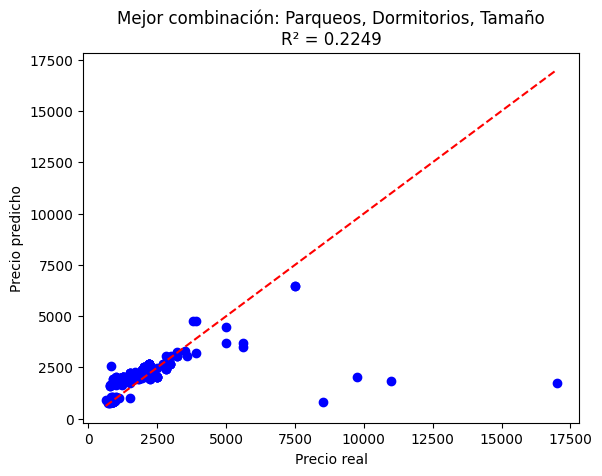

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import re

# Configurar pandas para evitar notación científica
pd.options.display.float_format = '{:,.0f}'.format

# Cargar los datos desde un archivo CSV
data = pd.read_csv("apartamentos_zona_14.csv")

# Función para limpiar precios
def clean_price(price):
    if pd.isna(price) or price == "N/A":
        return None
    price = re.sub(r'[^0-9]', '', str(price))  # Eliminar caracteres no numéricos
    try:
        return int(price)  # Convertir a entero
    except ValueError:
        return None

# Función para limpiar parqueos
def clean_parking(parking):
    if pd.isna(parking) or parking == "N/A":
        return None
    try:
        return int(parking)
    except ValueError:
        return None

# Función para limpiar el tamaño (eliminar "m2" y convertir a número)
def clean_size(size):
    if pd.isna(size) or size == "N/A":
        return None
    size = str(size).replace("m2", "").strip()  # Eliminar "m2" y espacios extra
    try:
        return float(size)  # Convertir a número
    except ValueError:
        return None

# Aplicar limpieza a las columnas relevantes
data["Precio"] = data["Precio"].apply(clean_price)
data["Parqueos"] = data["Parqueos"].apply(clean_parking)
data["Tamaño"] = data["Tamaño"].apply(clean_size)

# Eliminar filas con valores nulos en las columnas relevantes
data_clean = data.dropna(subset=["Precio", "Parqueos", "Dormitorios", "Baños", "Tamaño"])

# Verificar si hay datos suficientes
if data_clean.empty:
    print("No hay suficientes datos para la regresión múltiple.")
else:
    print("Resumen de datos después de limpieza:")
    print(data_clean.describe())

    # Definir todas las combinaciones de variables a probar
    combinaciones = [
        {"nombre": "Parqueos, Dormitorios, Baños", "variables": ["Parqueos", "Dormitorios", "Baños"]},
        {"nombre": "Dormitorios, Baños, Tamaño", "variables": ["Dormitorios", "Baños", "Tamaño"]},
        {"nombre": "Parqueos, Dormitorios, Tamaño", "variables": ["Parqueos", "Dormitorios", "Tamaño"]},
        {"nombre": "Parqueos, Baños, Tamaño", "variables": ["Parqueos", "Baños", "Tamaño"]},
        {"nombre": "Dormitorios, Tamaño", "variables": ["Dormitorios", "Tamaño"]},
        {"nombre": "Baños, Tamaño", "variables": ["Baños", "Tamaño"]},
        {"nombre": "Parqueos, Tamaño", "variables": ["Parqueos", "Tamaño"]},
    ]

    # Probar cada combinación y guardar los resultados
    resultados = []
    for combinacion in combinaciones:
        # Definir las variables independientes (X) y dependiente (y)
        X = data_clean[combinacion["variables"]]
        y = data_clean["Precio"]

        # Verificar que no haya valores NaN en X
        if X.isnull().any().any():
            print(f"Advertencia: {combinacion['nombre']} contiene valores NaN. Eliminando filas con NaN...")
            X = X.dropna()
            y = y[X.index]  # Asegurarse de que y tenga el mismo índice que X

        # Crear el modelo de regresión lineal múltiple
        model = LinearRegression()
        model.fit(X, y)

        # Calcular R²
        r_squared = model.score(X, y)

        # Guardar los resultados
        resultados.append({
            "Combinación": combinacion["nombre"],
            "Coeficientes": model.coef_,
            "Intercepto": model.intercept_,
            "R²": r_squared
        })

    # Mostrar los resultados de todas las combinaciones
    print("\nResultados de todas las combinaciones:")
    resultados_df = pd.DataFrame(resultados)
    print(resultados_df)

    # Comparar los coeficientes de cada modelo
    print("\nComparación de coeficientes:")
    for index, row in resultados_df.iterrows():
        print(f"\nCombinación: {row['Combinación']}")
        print(f"Coeficientes: {row['Coeficientes']}")
        print(f"Intercepto: {row['Intercepto']}")
        print(f"R²: {row['R²']}")

    # Encontrar la mejor combinación basada en R² y coherencia de coeficientes
    mejor_combinacion = resultados_df.loc[resultados_df["R²"].idxmax()]
    print(f"\nLa mejor combinación basada en R² es: {mejor_combinacion['Combinación']} con R² = {mejor_combinacion['R²']:.4f}")

    # Graficar los valores predichos vs los valores reales para la mejor combinación
    mejor_variables = mejor_combinacion["Combinación"].split(", ")
    X_mejor = data_clean[mejor_variables]
    y_mejor = data_clean["Precio"]

    model_mejor = LinearRegression()
    model_mejor.fit(X_mejor, y_mejor)

    plt.scatter(y_mejor, model_mejor.predict(X_mejor), color='blue')
    plt.plot([y_mejor.min(), y_mejor.max()], [y_mejor.min(), y_mejor.max()], color='red', linestyle='--')
    plt.xlabel("Precio real")
    plt.ylabel("Precio predicho")
    plt.ticklabel_format(style='plain', axis='both')  # Evitar notación científica en la gráfica
    plt.title(f"Mejor combinación: {mejor_combinacion['Combinación']}\nR² = {mejor_combinacion['R²']:.4f}")
    plt.show()